### Loading the Clean Excel File

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/youtube_sentiment_analysis/youtube_comments_english.xlsx')

In [ ]:
df.shape

(963063, 11)

### Tokeniziation Process

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize

text = "Hello world. This is a test."
print(sent_tokenize(text))


['Hello world.', 'This is a test.']


In [ ]:
from nltk import sent_tokenize, word_tokenize

text = "This video made me laugh_face_with_tears_of_joy"
tokens = word_tokenize(text)
print(tokens)


['This', 'video', 'made', 'me', 'laugh_face_with_tears_of_joy']


In [ ]:
# Download all necessary NLTK data
nltk.download(['stopwords', 'wordnet', 'omw-1.4'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
pd.set_option('display.max_colwidth',None)

In [ ]:
df['CommentText'].sample(3)

,CommentText
904715,she seems like a genuine and caring person i wish her all the best!
490546,"im gonna starting seo first project, how to check my website ranking currently?"
49659,"you should totally add me on roblox, the new limit is <NUM>k"


In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# Initialize tools
stop_words = set(stopwords.words('english')) - {'not', 'but', 'however', 'no', 'yet', 'your', 'you'}
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    """Full text preprocessing pipeline"""
    # 1. Lowercase
    text = text.lower()
    print(text)

    # 2. Remove punctuation (keep only !?:; and _)
    # Step 1: Identify punctuation to remove (all punctuation except what we want to keep)
    all_punct = set(string.punctuation)  # All punctuation marks
    keep_punct = {'!', '?', ':', ';', '_'}  # Punctuation we want to preserve
    remove_punct = all_punct - keep_punct  # Punctuation to remove

    # Step 2: Create translation table (maps each punctuation to None for removal)
    punct_map = {ord(char): None for char in remove_punct}

    # Step 3: Apply translation
    text = text.translate(punct_map)

    # 3. Tokenization
    tokens = word_tokenize(text)
    print(tokens)

    # 4. Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    print(tokens)

    # 5. Lemmatization (preserve special tokens)
    tokens = [lemmatizer.lemmatize(word, pos='v') if '_' not in word else word
              for word in tokens]

    print(tokens)

    # # 6. Filter tokens
    # tokens = [word for word in tokens if len(word) > 2 or '_' in word]
    print(tokens)
    return tokens


In [ ]:
text = "im gonna starting; seo first! project, how to check my website ranking currently?"

preprocess_text(text)

im gonna starting; seo first! project, how to check my website ranking currently?
['im', 'gon', 'na', 'starting', ';', 'seo', 'first', '!', 'project', 'how', 'to', 'check', 'my', 'website', 'ranking', 'currently', '?']
['im', 'gon', 'na', 'starting', ';', 'seo', 'first', '!', 'project', 'check', 'website', 'ranking', 'currently', '?']
['im', 'gon', 'na', 'start', ';', 'seo', 'first', '!', 'project', 'check', 'website', 'rank', 'currently', '?']
['im', 'gon', 'na', 'start', ';', 'seo', 'first', '!', 'project', 'check', 'website', 'rank', 'currently', '?']


['im',
 'gon',
 'na',
 'start',
 ';',
 'seo',
 'first',
 '!',
 'project',
 'check',
 'website',
 'rank',
 'currently',
 '?']

In [ ]:
# Test the function
text = "in python: im getting an error that says 'python' is not recognized as a command, function, script, or executable program. ive checked the spelling, and the path, what should i do? the error is occurring at line <NUM>, character <NUM>. it says commandnotfoundexception and objectnotfound."
preprocess_text(text)  # Correct function call

in python: im getting an error that says 'python' is not recognized as a command, function, script, or executable program. ive checked the spelling, and the path, what should i do? the error is occurring at line <num>, character <num>. it says commandnotfoundexception and objectnotfound.
['in', 'python', ':', 'im', 'getting', 'an', 'error', 'that', 'says', 'python', 'is', 'not', 'recognized', 'as', 'a', 'command', 'function', 'script', 'or', 'executable', 'program', 'ive', 'checked', 'the', 'spelling', 'and', 'the', 'path', 'what', 'should', 'i', 'do', '?', 'the', 'error', 'is', 'occurring', 'at', 'line', 'num', 'character', 'num', 'it', 'says', 'commandnotfoundexception', 'and', 'objectnotfound']
['python', ':', 'im', 'getting', 'error', 'says', 'python', 'not', 'recognized', 'command', 'function', 'script', 'executable', 'program', 'ive', 'checked', 'spelling', 'path', '?', 'error', 'occurring', 'line', 'num', 'character', 'num', 'says', 'commandnotfoundexception', 'objectnotfound']


['python',
 ':',
 'im',
 'get',
 'error',
 'say',
 'python',
 'not',
 'recognize',
 'command',
 'function',
 'script',
 'executable',
 'program',
 'ive',
 'check',
 'spell',
 'path',
 '?',
 'error',
 'occur',
 'line',
 'num',
 'character',
 'num',
 'say',
 'commandnotfoundexception',
 'objectnotfound']

In [ ]:
# Test with emoji text
test_text = "This video is hilarious laugh_face_with_tears_of_joy! Really loved it."
print(preprocess_text(test_text))

this video is hilarious laugh_face_with_tears_of_joy! really loved it.
['this', 'video', 'is', 'hilarious', 'laugh_face_with_tears_of_joy', '!', 'really', 'loved', 'it']
['video', 'hilarious', 'laugh_face_with_tears_of_joy', '!', 'really', 'loved']
['video', 'hilarious', 'laugh_face_with_tears_of_joy', '!', 'really', 'love']
['video', 'hilarious', 'laugh_face_with_tears_of_joy', '!', 'really', 'love']
['video', 'hilarious', 'laugh_face_with_tears_of_joy', '!', 'really', 'love']


In [ ]:
# Apply to your DataFrame
df['tokens'] = df['CommentText'].apply(preprocess_text)

### Bag of words Technique

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
df['Sentiment'] = df['Sentiment'].map({
    'Neutral': 0,
    'Positive':1,
    'Negative':-1
})

In [ ]:
df.shape

(963063, 11)

In [ ]:
# Drop rows where either 'CommentText' or 'Sentiment' is NaN
df = df.dropna(subset=['CommentText', 'Sentiment'])

In [ ]:
df.shape

(963055, 11)

In [ ]:
# Step 1: Vectorize the comments using Bag of Words (CountVectorizer)
vectorizer = CountVectorizer(max_features=5000, binary=True)  # Bag of Words model with a limit of 10000 features

In [ ]:
X_sparse = vectorizer.fit_transform(df['CommentText'])
y = df['Sentiment']

In [ ]:
print(f"Shape: {X_sparse.shape}")        # (num_comments, num_features)
print(f"Non-zero entries: {X_sparse.nnz}")  # Count of non-zero values
print(f"Density: {100 * X_sparse.nnz / (X_sparse.shape[0] * X_sparse.shape[1]):.4f}%")  # % non-zero

Shape: (963055, 5000)
Non-zero entries: 13858103
Density: 0.2878%


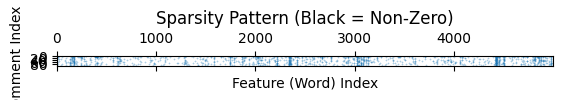

In [ ]:
import matplotlib.pyplot as plt
plt.spy(X_sparse[:100], markersize=0.1)  # Plot first 100 comments
plt.xlabel("Feature (Word) Index")
plt.ylabel("Comment Index")
plt.title("Sparsity Pattern (Black = Non-Zero)")
plt.show()

In [ ]:
# Get feature names (words) corresponding to columns
feature_names = vectorizer.get_feature_names_out()

# Sum word counts across all comments
word_counts = np.array(X_sparse.sum(axis=0)).flatten()
top_words_idx = np.argsort(word_counts)[-10:]  # Indices of top 10 words

print("Top 10 Words:")
for idx in reversed(top_words_idx):  # Print descending
    print(f"{feature_names[idx]}: {word_counts[idx]}")

Top 10 Words:
the: 382364
to: 280246
and: 243075
is: 241270
you: 189046
of: 185392
this: 180021
in: 179008
for: 168971
it: 157925


In [ ]:
y

,Sentiment
0,0
1,1
2,0
3,0
4,1
...,...
963058,0
963059,1
963060,-1
963061,0


In [ ]:
df['Sentiment'].value_counts(1)

,proportion
Sentiment,
1,0.338984
-1,0.338444
0,0.322572


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
X_train, X_test, y_train, y_test = train_test_split(X_sparse, y, test_size=0.2, random_state=42, stratify=y)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 11086885 stored elements and shape (770444, 5000)>

##### Random Forest Model Training

In [ ]:
# Log Random Forest parameters
n_estimators = 200
max_depth = 15

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=200, random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([ 1,  1,  1, ...,  0,  0, -1])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Log metrics for each class and accuracy
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
accuracy

0.5882789664141715

In [ ]:
classification_rep = classification_report(y_test, y_pred, output_dict=True)

Text(0.5, 1.0, 'Confusion Matrix')

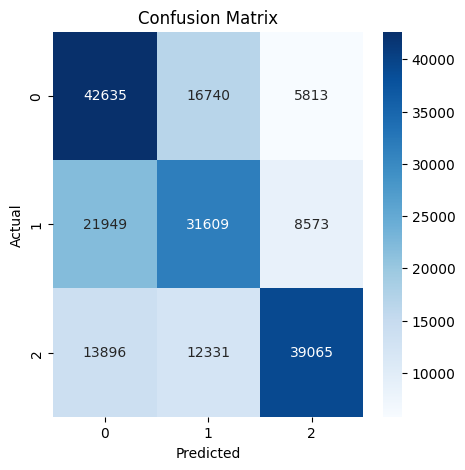

In [ ]:
# Confusion matrix plot
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.54      0.65      0.59     65188
           0       0.52      0.51      0.51     62131
           1       0.73      0.60      0.66     65292

    accuracy                           0.59    192611
   macro avg       0.60      0.59      0.59    192611
weighted avg       0.60      0.59      0.59    192611



##### Top 20 important features

In [ ]:
max(list(model.feature_importances_))

np.float64(0.0736401502877998)

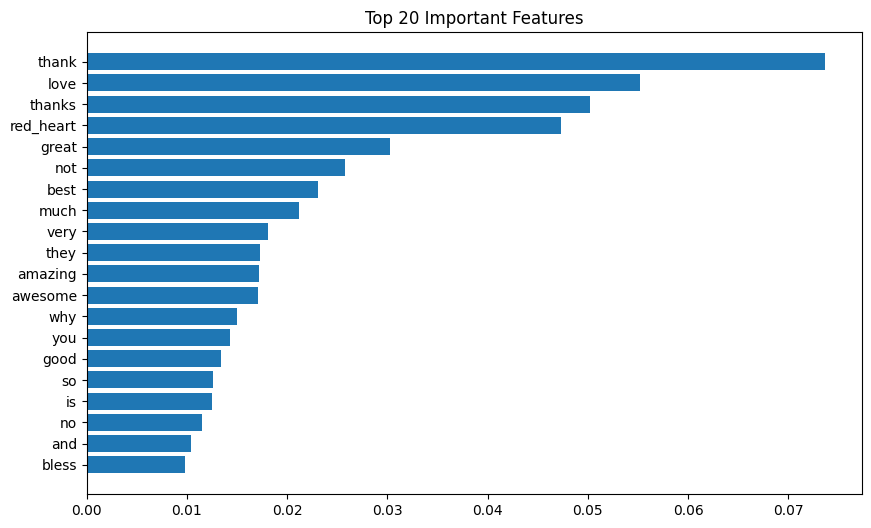

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importance scores
importance = model.feature_importances_
feature_names = vectorizer.get_feature_names_out()  # From CountVectorizer

# Create a DataFrame for visualization
df_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values('Importance', ascending=False)

# Plot top 20 important words
plt.figure(figsize=(10, 6))
plt.barh(df_importance['Feature'].head(20), df_importance['Importance'].head(20))
plt.gca().invert_yaxis()  # Highest importance at top
plt.title("Top 20 Important Features")
plt.show()

####  Get the top 20 important features based on Sentiment

           Word  Avg_Sentiment   Count
333     awesome       0.832567    9347
3609  red_heart       0.788793   37243
476       bless       0.786975    8384
4419      thank       0.769279   76222
151     amazing       0.766373   13299
4421     thanks       0.705215   32712
2672       love       0.639123   40687
438        best       0.602020   24255
1933      great       0.560487   33073
2917       much       0.389665   34776
1899       good       0.327537   35425
4735       very       0.159075   69967
4976        you       0.156896  237743
4060         so       0.015480  240631
171         and       0.010634  295006
2343         is      -0.062150  444151
3009         no      -0.193191  240958
3026        not      -0.296510  117055
4439       they      -0.317073   70252
4875        why      -0.421182   37371


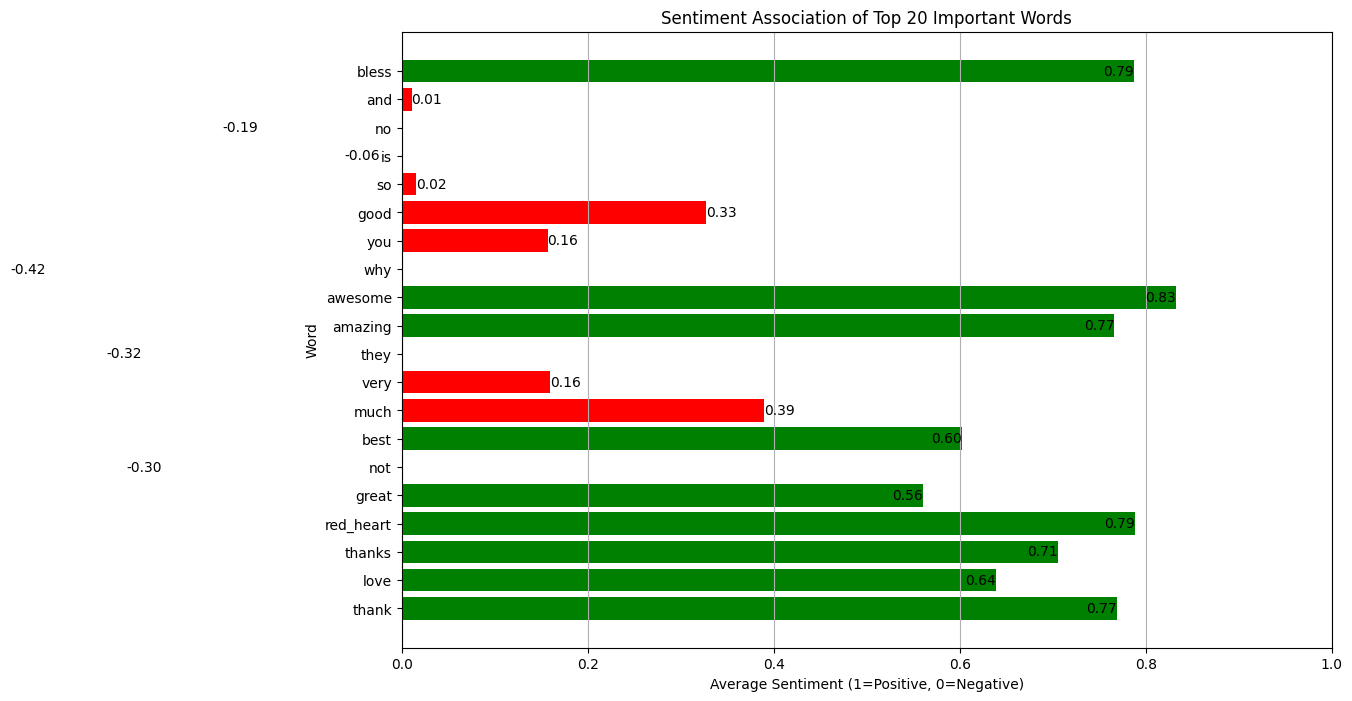

In [ ]:
# Get the top 20 important features
top_20_features = df_importance['Feature'].head(20)

# Create a DataFrame mapping words to average sentiment
word_sentiment = pd.DataFrame({
    'Word': top_20_features,
    'Avg_Sentiment': [df[df['CommentText'].str.contains(word, case=False, regex=False)]['Sentiment'].mean()
                      for word in top_20_features],
    'Count': [df['CommentText'].str.contains(word, case=False, regex=False).sum()
              for word in top_20_features]
})

# Display the table
print(word_sentiment.sort_values('Avg_Sentiment', ascending=False))

# Plot sentiment association
plt.figure(figsize=(12, 8))
bars = plt.barh(word_sentiment['Word'], word_sentiment['Avg_Sentiment'],
               color=word_sentiment['Avg_Sentiment'].apply(
                   lambda x: 'green' if x > 0.5 else 'red' if x < 0.5 else 'gray'))
plt.title('Sentiment Association of Top 20 Important Words')
plt.xlabel('Average Sentiment (1=Positive, 0=Negative)')
plt.ylabel('Word')
plt.xlim(0, 1)
plt.grid(axis='x')

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2,
             f'{width:.2f}',
             ha='left' if width < 0.5 else 'right',
             va='center')

plt.show()